# <font color=darkcyan>  Dimension reduction in Python </font>

### <font color=darkorange> SVD, Image compression, PCA, Classification, ICA</font>

### <font color=darkred>  Singular Value Decomposition applied to image compression </font>

The Singular Value Decomposition (SVD) states that for all $\mathbb{R}^{n \times d}$ matrix $A$ with rank $r$, there exist $\sigma_1\geqslant \ldots \geqslant \sigma_r>0$ such that
$$
A = \sum_{k=1}^r \sigma_k u_k v_k'\,,
$$
where $\{u_1,\ldots,u_r\}\in (\mathbb{R}^n)^r$ and $\{v_1,\ldots,v_r\}\in (\mathbb{R}^d)^r$ are two orthonormal families. The vectors $\{\sigma_1,\ldots,\sigma_r\}$ are called singular values of $A$ and $\{u_1,\ldots,u_r\}$ (resp. $\{v_1,\ldots,v_r\}$) are the left-singular (resp. right-singular) vectors of $A$.


1. If $U$ denotes the $\mathbb{R}^{n\times r}$ matrix with columns given by $\{u_1,\ldots,u_r\}$ and $V$ denotes the $\mathbb{R}^{p \times r}$ matrix with columns given by $\{v_1,\ldots,v_r\}$, then the singular value decomposition of $A$ may also be written as
$$
A = UD_rV'\,,
$$
where $D_r = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$.


2. The singular value decomposition is closely related to the spectral theorem for symmetric semipositive definite matrices. In the framework of this practical session, $A'A$ and $AA'$ are positive semidefinite such that
$$
A'A = VD_r^2V'\quad\mathrm{and}\quad AA' = UD_r^2U'\,.
$$

The numpy.linalg.svd function can be used in Python to compute the SVD of a given matrix. The output of this function are:
1. $U$ has left singular vectors in the columns ;
2. sigma is rank 1 numpy array with singular values ;
3. $V$ has right singular vectors in the rows.

In [26]:
# ignore warnings for better clarity (may not be the best thing to do)...
import warnings
warnings.filterwarnings('ignore')

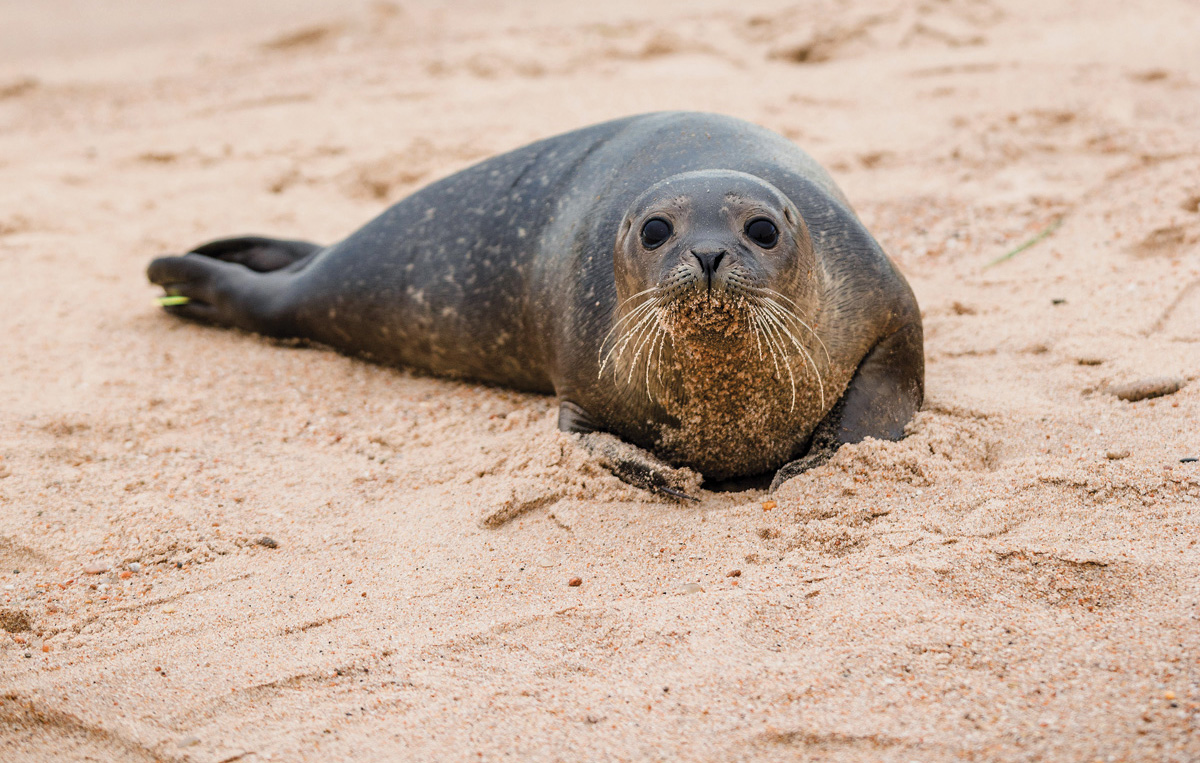

In [27]:
from PIL import Image, ImageFile
# Image.open is used to open the input picture (with any .jpg or .png)
img = Image.open('./test_image.jpg')
img

In [28]:
import numpy as np
import matplotlib.pyplot as plt
# Image converted into a numpy array or matrix
img_mat       = np.array(list(img.getdata(band=0)), float)
img_mat.shape = (img.size[1], img.size[0])
img_mat       = np.matrix(img_mat)
# SVD can then be applied to the matrix img_mat

In [32]:
# write a function with input the path of an image "path_image" and an integer "k" 
# and return in gray scale the reconstructed picture with the first k singular values
def svd_decomposition(path_image,k):
    img           = Image.open(path_image)
    img_mat       = np.array(list(img.getdata(band=0)), float)
    img_mat.shape = (img.size[1], img.size[0])
    img_mat       = np.matrix(img_mat)
    
    # Perform Singular Value Decomposition
    U, sigma, V = np.linalg.svd(img_mat)
    print('Size left singular eigenvectors  ' + str(np.shape(U)))
    print('Size right singular eigenvectors  ' + str(np.shape(V)))
    print('Size eigenvalues matrix ' + str(np.shape(sigma)))
    
    # Image reconstruction
    reconstimg = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    
    fig = plt.figure(1)
    plt.plot(sigma[0:12]*100/np.sum(sigma))
    plt.title("Normalized values of the singular values (in %)")
    fig = plt.figure(2)
    plt.title("Image reconstruction with %g singular values"%k)
    plt.imshow(reconstimg, cmap='gray')
    plt.axis('off')

In [33]:
# Image reconstruction using interact to analyze the influence of the number of singular values
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(svd_decomposition,path_image='./test_image.jpg',k=(1,100));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KFRleHQodmFsdWU9dScuL3Rlc3RfaW1hZ2UuanBnJywgZGVzY3JpcHRpb249dSdwYXRoX2ltYWdlJyksIEludFNsaWRlcih2YWx1ZT01MCwgZGVzY3JpcHTigKY=


### <font color=darkred>  Principal Component Analysis </font>

#### <font color=darkred>Application of the SVD to Principal Component Analysis</font>

Let $(X_i)_{1\leqslant i\leqslant n}$ be i.i.d. random variables in $\mathbb{R}^d$ and consider the matrix $X\in\mathbb{R}^{n\times d}$ such that the $i$-th row of $X$ is the observation $X'_i$. Let $\Sigma_n$ be the empirical covariance matrix (data are assumed to be centered for simplicity, this can be done manually):
$$
\Sigma_n = n^{-1}\sum_{i=1}^n X_i X'_i\,.
$$
Principal Component Analysis  aims at reducing the dimensionality of the observations $(X_i)_{1\leqslant i \leqslant n}$ using a "compression" matrix $W\in \mathbb{R}^{p\times d}$ with $p\leqslant d$ so that for each $1\leqslant i \leqslant n$, $WX_i$ ia a low dimensional representation of $X_i$. The original observation may then be partially recovered using another matrix $U\in \mathbb{R}^{d\times p}$. Principal Component Analysis computes $U$ and $W$ using the least squares approach:
$$
(U_{\star},W_{\star}) \in \hspace{-0.5cm}\underset{(U,W)\in \mathbb{R}^{d\times p}\times \mathbb{R}^{p\times d}}{\mathrm{argmin}} \;\sum_{i=1}^n\|X_i - UWX_i\|^2\,, 
$$

Let $(U_{\star},W_{\star})\in \mathbb{R}^{d\times p}\times \mathbb{R}^{p\times d}$ be a solution to this problem. Then, it can be proved that the columns of $U_{\star}$ are orthonormal and $W_{\star} = U_{\star}'$. Therefore, solving the optimization problem boils down to computing
$$
U_{\star} \in \hspace{-0.5cm}\underset{U\in \mathbb{R}^{d\times p}\,,\, U'U = I_n}{\mathrm{argmax}} \hspace{-.4cm}\{ \mathrm{trace}(U'\Sigma_nU)\}\,.
$$
Let $\{\vartheta_1,\ldots,\vartheta_d\}$ be orthonormal eigenvectors associated with the eigenvalues $\lambda_1\geqslant \ldots \geqslant \lambda_d$ of $\Sigma_n$. Then a solution is given by the matrix $U_{\star}$ with columns $\{\vartheta_1,\ldots,\vartheta_p\}$ and $W_{\star} = U_{\star}'$.

#### <font color=darkred>Principal Component Analysis as an optimization problem</font>

For any dimension $1\leqslant p \leqslant  d$, let $\mathcal{F}_d^p$ be the set of all vector suspaces of $\mathbb{R}^d$ with dimension $p$. Principal Component Analysis computes a linear span $V_d$ such as
$$
V_p \in \underset{V\in \mathcal{F}_d^p}{\mathrm{argmin}} \;\sum_{i=1}^n\|X_i - \pi_V(X_i)\|^2\,, 
$$
where $\pi_V$ is the orthogonal projection onto the linear span $V$. Consequently, $V_1$ is a solution if and only if $v_1$ is solution to:
$$
v_1 \in \underset{v \in \mathbb{R}^d\,;\, \|v\|=1}{\mathrm{argmax}} \sum_{i=1}^n   \langle X_i, v \rangle^2\,.
$$
For all $2\leqslant p \leqslant d$, following the same steps, it can be proved that  a solution is given by $V_p = \mathrm{span}\{v_1, \ldots, v_p\}$ where
$$
v_1 \in \underset{v\in \mathbb{R}^d\,;\,\|v\|=1}{\mathrm{argmax}} \sum_{i=1}^n\langle X_i,v\rangle^2 \quad\mbox{and for all}\;\; 2\leqslant k \leqslant p\;,\;\; v_k \in \underset{\substack{v\in \mathbb{R}^d\,;\,\|v\|=1\,;\\ v\perp v_1,\ldots,v\perp v_{k-1}}}{\mathrm{argmax}}\sum_{i=1}^n\langle X_i,v\rangle^2\,. 
$$

As $V_p = \mathrm{span}\{\vartheta_1, \ldots, \vartheta_p\}$, for all $1\leqslant i\leqslant n$,
$$
\pi_{V_p}(X_i) = \sum_{k=1}^p \langle X_i,\vartheta_k\rangle \vartheta_k  = \sum_{k=1}^p (X'_i \vartheta_k)\vartheta_k = \sum_{k=1}^p c_k(i)\vartheta_k\,,
$$
where for all $1\leqslant k \leqslant p$, the $k$-th principal component is defined as $c_k = X\vartheta_k$. Therefore the $k$-th principal component is the vector whose components are the coordinates of each $X_i$, $1\leqslant i\leqslant n$, relative to the basis $\{\vartheta_1, \ldots, \vartheta_p\}$ of $V_p$.

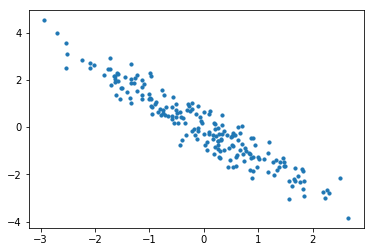

In [34]:
# Build a data set with n=100 bi-dimensional i.i.d. data with centered Gaussian distribution
X = np.dot(np.random.normal(0,1,[2,2]), np.random.normal(0,1,[2,200])).T
plt.scatter(X[:, 0], X[:, 1], s = 10)

In [35]:
# perform a PCA with one component using PCA(n_components=1) and the function fit.
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)
pca.fit(X)
print('The principal component is:')
print(pca.components_)

print('The explained variance is %g'%pca.explained_variance_)
print('The associated singular value is %g'%pca.singular_values_)

# Apply the dimensionality reduction on X
# X_pca contains the coordinates of each data in the space generated by the principal components
X_pca = pca.transform(X)

# in this case pca.components_[k] contains the coordinates of the k-th principal component in
# the original space (here the usual Euclidian plane). In a general case pca.components_[k] is a 
# d-dimensional vector.
# X_pca[i] contains the coordinates of the i-th data in the vector space generated by the principal 
# components.
# Therefore, X_pca[i] is a vector with n_components entries. 

The principal component is:
[[-0.59013549  0.80730422]]
The explained variance is 3.59329
The associated singular value is 26.7407


In a general case, when $\mathrm{n\_components} = p$ for all $1\leqslant i\leqslant n$ and all $1\leqslant k \leqslant p$, the
projection of $X_i$ in the space generated by the principal components is:

$$
\pi_{V_p}(X_i) = \sum_{k=1}^{p}X_{\mathrm{pca}}[i]_k \times \mathrm{pca.components\_}[k]\,.
$$

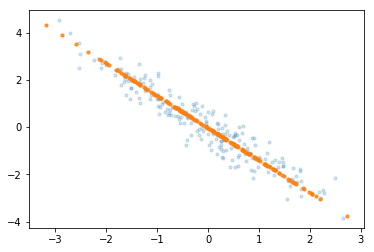

In [36]:
# transform the reduced data set in the original space
# X_inverse[i,:] contains the coordinates of the projection of Xi in the original space
X_inverse = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, s=10)
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], alpha=0.8, s=10)

In [37]:
# Data must be centered and scaled when the variables have different units, such as height (cm) and weight (kg). 
# This prevents the main directions from being governed by one or more variables with a higher variance than the 
# other variables. See the illustration below.
# When the variables have the same unit, the reduction should be considered on a case-by-case basis. 
# Sometimes, it is not advised to force variances to be equal (for example, with respect to grades, we may want to discriminate 
# more against students in relation to a subject whose grades vary more)

The first principal component explains 0.934423 of the variance
The second principal component explains 0.064793 of the variance


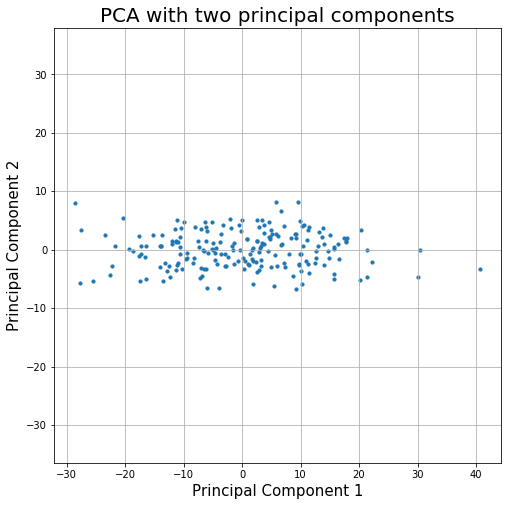

In [38]:
import pandas as pd
X = np.dot(np.random.normal(0,1,[3,3]), np.random.normal(0,1,[3,200])).T
X[:,0] = 10*X[:,0] + 15 
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with two principal components', fontsize = 20)
ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], s = 10)
ax.grid()

print('The first principal component explains %f of the variance'%pca.explained_variance_ratio_[0])  
print('The second principal component explains %f of the variance'%pca.explained_variance_ratio_[1]) 
plt.axis('equal');

The first principal component explains 0.704614 of the variance
The second principal component explains 0.287132 of the variance


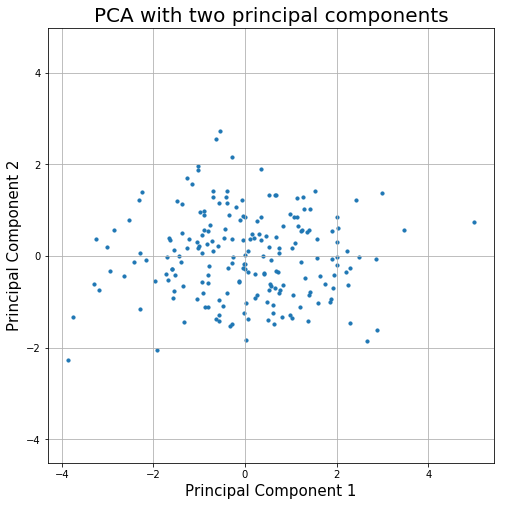

In [39]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(X_scaled) 

principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with two principal components', fontsize = 20)
ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], s = 10)
ax.grid()
plt.axis('equal');

print('The first principal component explains %f of the variance'%pca.explained_variance_ratio_[0])  
print('The second principal component explains %f of the variance'%pca.explained_variance_ratio_[1]) 

In [40]:
# If you perform a standardized PCA on a huge number of variables: the percentage of variability of the two first dimensions
# is not necessarily small. In the case of independent Gaussian variables, the percentage of variability decreases with the 
# dimension. If the data set is made by a copy of the same variable in each column, the percentage variability of the two first
# dimensions will then be 100% regardless of the number of columns.

In [41]:
# a scaled PCA has been performed with 4 data sets:

<img src="./PCA_cor.png" width="500" height="700">

In [42]:
# it is possible to link these correlation matrices with the PCA results.
# The value of the first eigenvalue approximately gives the number of correlated 
# variables explained by the first dimension.

# The matrix A seems to be a block diagonal matrix with blocks of size $3x3$ and $2x2$. 
# The block of size $2x2$ is close to the matrix with only ones (which is of rank 1) thus 
# one eigenvalue must be close to zero. This corresponds to PCA 4.

# The matrix B is has all its entries near one, thus it is close to a matrix of
# rank one. If this matrix was of rank one, the variance could be explained with
# the first component only. In that case, the inertia associated with the first
# component would be $5$ and $0$ for the other components. This corresponds to PCA 1.

# The matrix D is close to the identity. The PCA applied to the identity would
# give the same inertia to all components (inertia close to 1). This corresponds
# to PCA 2.

# The matrix C is similar to B but the correlation are weaker. Thus the first
# component has a high inertia. This corresponds to PCA 3.

In [43]:
# in the graph below, it is possible to give roughly the percentage of variability explained by the first dimension
# and by the first plane.

<img src="./AnaDo_ACP_exo_Graphe_var2.jpg" width="600" height="600">

In [44]:
# the number of variables aligned with the first two dimensions should be divided by the total number of variables. 
# The first dimension explains 44% of the variability and the first plane 77%. The percentage of explained variance is equal to the sum of square norms of
# projection of variables along the first axis. Variables V5, V6, V9 are orthogonal to the first axis and variables V7 and V8 are not well represented by
# the first plan (and thus are orthogonal to this plan and in particular to the first axis). Roughly, the norm of V1, V2, V3 and V4 is one which leads to a
# percentage of variance for the first axis equal to $4/9$. Similarly, for the first plan, we have a percentage of variance 
# equal to $7/9$ since the norm of $V5$ and $V9$ is close to one.

## <font color=darkred> PCA on a real data set </font>

In [45]:
# this section focuses on a data set where each observation is a global confort given by an employee 
# in a large building (related to temperature, noise, CO2 level).

In [46]:
# import the data about confort at workplace "data_confort.csv"
df = pd.read_csv('data_confort.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5,Feat_6,Feat_7,Feat_8,Feat_9,Feat_10,Feat_11,Feat_12,Feat_13,Feat_14,Feat_15,Feat_16,Class_1,Class_2,Class_3,Class_4
0,6.892923,0.097474,0.671878,5.552857,0.083338,0.462762,4.961384,0.092895,0.675383,5.433751,0.124294,0.675383,4.118373,0.070154,0.288920,1504.407471,0.0,0.0,0.0,0.0
1,6.885601,0.097581,0.671906,5.579402,0.084254,0.470088,4.891641,0.094180,0.648615,5.191752,0.124932,0.648615,4.090106,0.070573,0.288651,1504.407471,0.0,0.0,0.0,0.0
2,6.914284,0.097166,0.671834,5.601692,0.083881,0.469878,4.903616,0.093959,0.648619,5.283781,0.122757,0.648619,4.222674,0.070388,0.297224,1504.315430,0.0,0.0,0.0,0.0
3,5.296551,0.096910,0.513291,5.630812,0.083472,0.470013,4.271865,0.094217,0.527711,4.307137,0.122520,0.527711,4.238272,0.070149,0.297311,1504.374023,0.0,0.0,0.0,0.0
4,6.271650,0.096628,0.606015,5.625172,0.083554,0.470007,4.271246,0.094256,0.484628,3.959912,0.122384,0.484628,4.245887,0.070087,0.297580,1504.374023,0.0,0.0,0.0,0.0


In [47]:
# Data rescaling using min_max_scaler
from sklearn.preprocessing import MinMaxScaler
array          = df.values 
min_max_scaler = MinMaxScaler()
x_scaled       = min_max_scaler.fit_transform(array)
X              = (pd.DataFrame(x_scaled, columns = df.columns))
X.head()

,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5,Feat_6,Feat_7,Feat_8,Feat_9,Feat_10,Feat_11,Feat_12,Feat_13,Feat_14,Feat_15,Feat_16,Class_1,Class_2,Class_3,Class_4
0,0.074979,0.466853,0.210116,0.082916,0.208745,0.144675,0.055600,0.290320,0.177483,0.059743,0.173832,0.177483,0.056806,0.254565,0.176886,0.998522,0.0,0.0,0.0,0.0
1,0.074847,0.467376,0.210125,0.083525,0.211080,0.146993,0.054174,0.294392,0.170393,0.055607,0.174734,0.170393,0.056052,0.256117,0.176718,0.998522,0.0,0.0,0.0,0.0
2,0.075365,0.465360,0.210102,0.084037,0.210130,0.146926,0.054419,0.293691,0.170394,0.057180,0.171657,0.170394,0.059589,0.255430,0.182063,0.998461,0.0,0.0,0.0,0.0
3,0.046148,0.464119,0.160166,0.084705,0.209086,0.146969,0.041507,0.294511,0.138369,0.040487,0.171323,0.138369,0.060005,0.254547,0.182118,0.998500,0.0,0.0,0.0,0.0
4,0.063759,0.462747,0.189371,0.084575,0.209297,0.146967,0.041495,0.294633,0.126958,0.034552,0.171129,0.126958,0.060208,0.254316,0.182286,0.998500,0.0,0.0,0.0,0.0


In [48]:
# each category is defines as follows if Class_i = 1 it means that the confort is affected either by 
# CO2 level, humidity, temperature or noise level at the time of the data collection.
# if all Class_i = 0, this means that the confort is good enough (category 0).
categories = []
for i in df.iloc[:,-4:].values:
    if np.array_equal(i, [0,0,0,0]):
        categories.append(0) 
    
    elif np.array_equal(i, [0,0,0,1]):
        categories.append(1) 
    
    elif np.array_equal(i, [0,0,1,0]):
        categories.append(2) 
    
    elif np.array_equal(i, [0,1,0,0]):
        categories.append(3) 
    
    else :
        categories.append(4) 

In [49]:
# categories Class_1, Class_2, etc. are replaced by a single category in {0,1,2,3,4} 
X['categories'] = np.array(categories)
X = X.drop(["Class_1", "Class_2", "Class_3", "Class_4"],1)

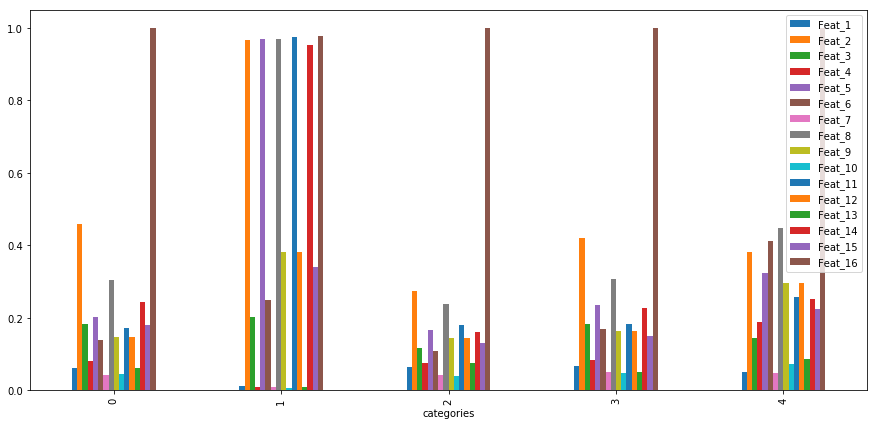

In [50]:
# means of the features grouped by categories using the function groupby
X.groupby(["categories"]).mean().plot(kind='bar',figsize=(15,7))

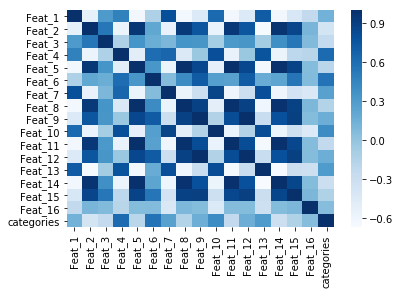

In [51]:
# display the correlations of the features and the categories using heatmap
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap = 'Blues')

In [52]:
# compute the mean table by category. 
# the function apply is used to compute the mean value of each feature in each category with respect 
# to its mean value in the best confort category.
mean_table = X.groupby(['categories']).mean().T
index_list = mean_table.index.values
mean_table = pd.DataFrame(mean_table.values, index=index_list,columns=['5','4','3','2','1'])
mean_table["4 % 5"] = mean_table.apply(lambda x : (x.iloc[1] - x.iloc[0]) / x.iloc[0]*100,axis=1 )
mean_table["3 % 5"] = mean_table.apply(lambda x : (x.iloc[2] - x.iloc[0]) / x.iloc[0]*100,axis=1 )
mean_table["2 % 5"] = mean_table.apply(lambda x : (x.iloc[3] - x.iloc[0]) / x.iloc[0]*100,axis=1 )
mean_table["1 % 5"] = mean_table.apply(lambda x : (x.iloc[4] - x.iloc[0]) / x.iloc[0]*100,axis=1 )
mean_table.head()

,5,4,3,2,1,4 % 5,3 % 5,2 % 5,1 % 5
Feat_1,0.061430,0.012044,0.065753,0.068633,0.052081,-80.393918,7.037066,11.724996,-15.219641
Feat_2,0.459242,0.965644,0.274325,0.420285,0.382212,110.268974,-40.265628,-8.482822,-16.773414
Feat_3,0.184138,0.202456,0.115751,0.183827,0.143279,9.947573,-37.139353,-0.169012,-22.189634
Feat_4,0.081864,0.008897,0.074323,0.084083,0.189406,-89.132197,-9.212313,2.709882,131.365905
Feat_5,0.202921,0.967964,0.166867,0.236747,0.322749,377.015444,-17.767622,16.669371,59.051636


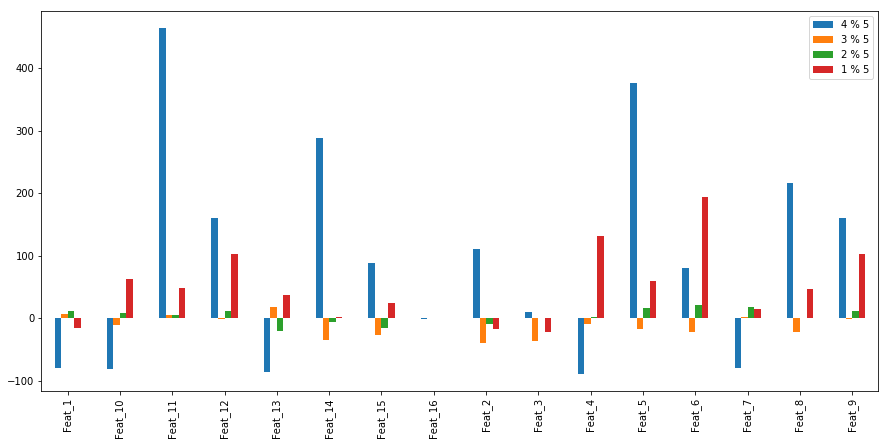

In [53]:
# plot the associated values
mean_table.iloc[:,-4:].groupby(index_list).mean().plot(kind='bar',figsize=(15,7))

<font color=darkred> Provide boxplots of some features among categories</font>

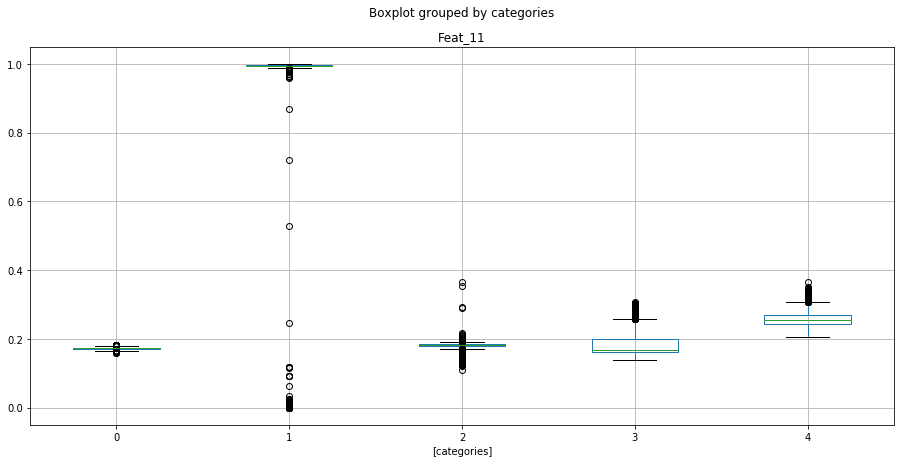

In [54]:
# some boxplots displaying the distribution of a feature within each category.
# This may help to detect useless features for classification... or a feature highly impacted by the category.
X.boxplot('Feat_11', by=['categories'],figsize=(15,7))

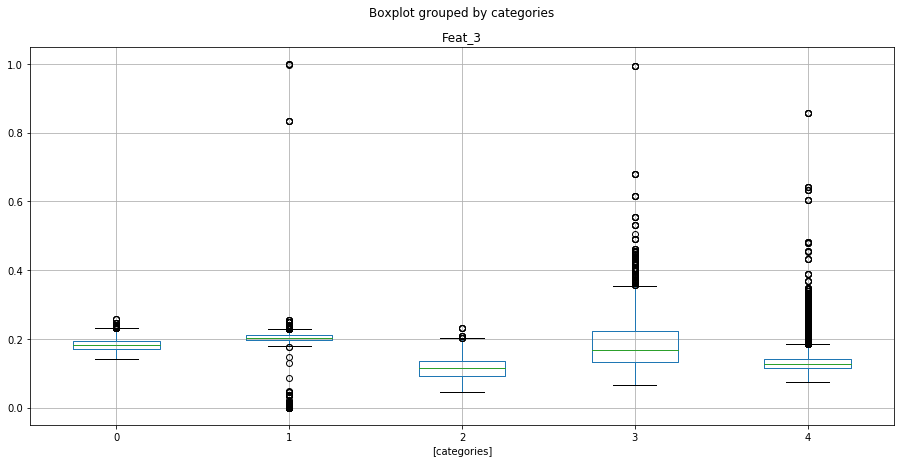

In [55]:
X.boxplot('Feat_3', by=['categories'],figsize=(15,7))

In [56]:
# compute a PCA with two components (after data scaling)
from sklearn import preprocessing 
norm_pca = preprocessing.scale(X)
n_comp = 6
pca = PCA(n_components = n_comp)

x = norm_pca[:,:-1]

principalComponents = pca.fit_transform(x)
principalDf         = pd.DataFrame(data = principalComponents, columns = ['Princ. Comp. ' + str(i) for i in range(n_comp)])

finalDf = pd.concat([principalDf, X.categories], axis = 1)

C:\Users\Tonguz-lab-Mouse\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
finalDf.head()

,Princ. Comp. 0,Princ. Comp. 1,Princ. Comp. 2,Princ. Comp. 3,Princ. Comp. 4,Princ. Comp. 5,categories
0,1.322276,-0.074372,1.091784,-0.432674,-0.095986,0.428370,0
1,1.304541,-0.173257,1.086581,-0.460241,-0.164750,0.346922,0
2,1.334560,-0.101707,1.097660,-0.461229,-0.101684,0.287041,0
3,1.194593,-0.951006,0.153673,-0.064119,-0.100636,-0.180234,0
4,1.280425,-0.887519,0.718967,-0.410796,-0.315982,-0.317774,0


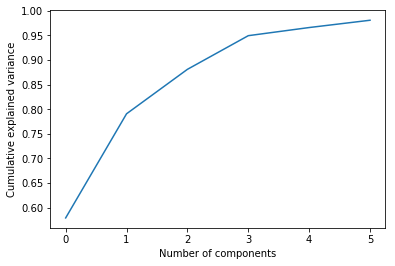

In [58]:
pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

## <font color=darkred> Use of PCA before Machine learning applications (classification here)</font>

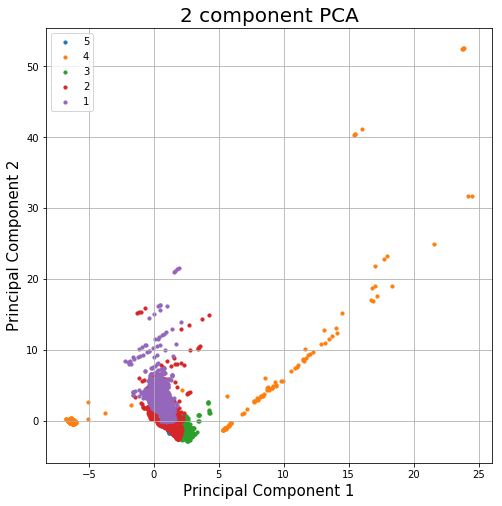

In [59]:
# provide a clustering of the in the plane given by the first two principal components (for illustration purposes)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets_names = ['5','4','3','2','1']
targets = [0,1,2,3,4]

for target in targets:
    indicesToKeep = finalDf['categories'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Princ. Comp. 0'], finalDf.loc[indicesToKeep, 'Princ. Comp. 1'],s=10)

ax.legend(targets_names)
ax.grid()

In [60]:
pca.explained_variance_ratio_

array([0.57887542, 0.211658  , 0.09037537, 0.06842537, 0.0165325 ,
       0.0148344 ])

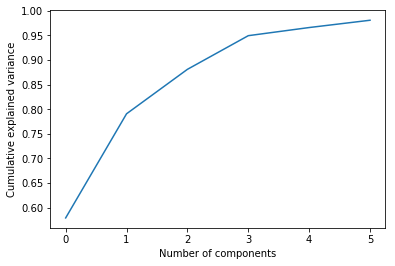

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

<font color=darkred> Split the dataset using 70% of the data to learn a classifier and 30% to test the classifier performance.</font>

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time

In [63]:
X_train , X_test, Y_train , Y_test = train_test_split(X.iloc[:,:-1] , X.iloc[:,-1] , test_size = 0.3)

In [64]:
X_train.head()

,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5,Feat_6,Feat_7,Feat_8,Feat_9,Feat_10,Feat_11,Feat_12,Feat_13,Feat_14,Feat_15,Feat_16
1678,0.050128,0.460119,0.165461,0.076985,0.199765,0.131953,0.038419,0.311833,0.158961,0.051614,0.170746,0.158961,0.050748,0.241348,0.158294,0.998438
4148,0.051183,0.460845,0.167491,0.076499,0.201774,0.132734,0.035658,0.309920,0.162449,0.051442,0.174864,0.162449,0.050051,0.237112,0.154452,0.998253
11380,0.095723,0.674047,0.353485,0.089176,0.261105,0.189754,0.076419,0.365556,0.225042,0.065599,0.207375,0.225042,0.054396,0.270685,0.183866,0.998994
25653,0.041378,0.414077,0.135764,0.179568,0.368930,0.450064,0.048079,0.499105,0.339048,0.081013,0.270270,0.339048,0.085711,0.266724,0.228721,0.999134
25209,0.046766,0.386513,0.134367,0.219291,0.338188,0.486271,0.062465,0.468810,0.333029,0.082106,0.262922,0.333029,0.101509,0.252903,0.248559,0.999303


In [65]:
Y_train.head()

1678     0
4148     0
11380    3
25653    4
25209    4
Name: categories, dtype: int32

<font color=darkred> Use a PCA with 2 components before learning a Support Vector Machine classifier (with SVC) on the training set. Compute the classification score.</font>

In [66]:
start_t = time.time()
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_transform = pca.transform(X_train)
X_test_transform  = pca.transform(X_test)

clf = SVC()
clf.fit(X_train_transform, Y_train)
end_t = time.time()
print('Classification score %g'%clf.score(X_test_transform, Y_test))
print('Computational time %g sec.'%(end_t-start_t))

Classification score 0.910729
Computational time 3.528 sec.


<font color=darkred> Compare the results for several number of components using cross validation.</font>

In [67]:
test_score = np.zeros(10)
comp_time  = np.zeros(10)
for n_comp in np.arange(2,12):
    start_t = time.time()
    pca     = PCA(n_components=n_comp)

    pca.fit(X.iloc[:,:-1])

    X_transform          = pca.transform(X.iloc[:,:-1])
    kfold                = StratifiedKFold(n_splits=5, shuffle=True) 
    cv_results           = cross_val_score(clf, X_transform, X["categories"], cv=kfold)
    comp_time[n_comp-2]  = time.time()-start_t
    test_score[n_comp-2] = cv_results.mean()

In [ ]:
figure = plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.plot(np.arange(2,12),test_score, '-')
plt.xlabel('Number of dimensions')
plt.ylabel('Cross validation score')
plt.subplot(1,2,2)
plt.plot(np.arange(2,12),comp_time, '-')
plt.xlabel('Number of dimensions')
plt.ylabel('Computational time (s)')
plt.tight_layout()

## <font color=darkred> Independent component analysis (ICA)</font>

ICA is a computational method aims at decomposing a multivariate signal into subcomponents assumed to be non-Gaussian signals and statistically independent. In the noise free formulation of ICA the signal is written:
$$
X = AS\,,
$$
where $A\in\mathbb{R}^{d\times n}$ is an unknown \alert{mixing} matrix, $S\in\mathbb{R}^{n}$ is a random vector with independent entries. Each component $1\leqslant i\leqslant n$ of the signal is a mixture of the independent components with unknown weights:
$$
X_i = a_{i,1}S_1 + \ldots + a_{i,d}S_d\,.
$$
ICA algorithms are designed to estimate the matrix $A$ and the source signals $S$.

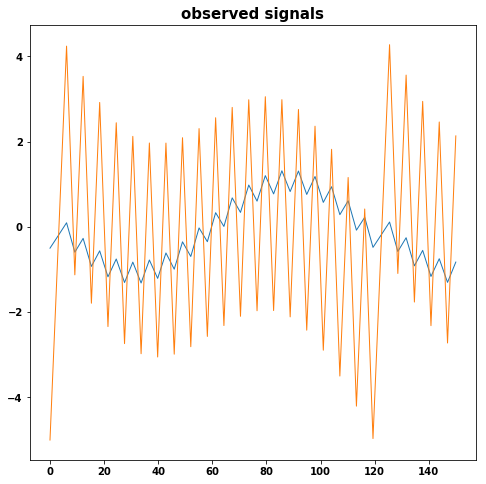

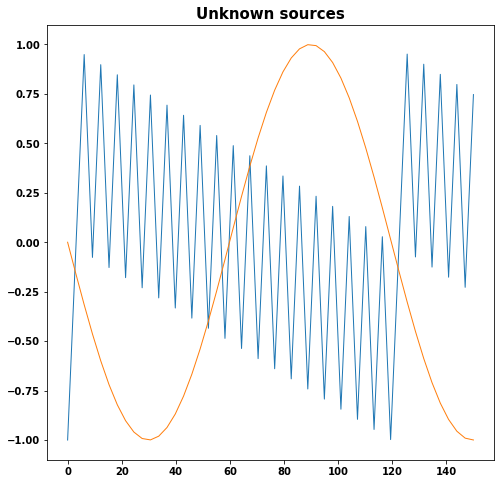

In [5]:
from scipy import signal
time_steps = np.linspace(0,150,50)

# Sources
S = np.array([signal.sawtooth(time_steps),
              np.sin(2*time_steps)]).T

A = np.array([[0.5, 5.0],
              [1.2, 1.6]])

# Observed signal
X = S.dot(A).T

fig = plt.figure(figsize = (8,8))
plt.plot(time_steps, X[0], lw = 1)
plt.plot(time_steps, X[1], lw = 1)
plt.title('observed signals', fontsize = 15);

fig = plt.figure(figsize = (8,8))
plt.plot(time_steps, S, lw = 1)
plt.title('Unknown sources', fontsize = 15);

Preprocessing proceeds in two steps. The first step amounts to `centering` the data. For all $1\leqslant i \leqslant d$,

$$\tilde x_{ij} = x_{ij}-{\frac {1}{n}}\sum _{\ell = 1}^nx_{i\ell}\,.$$

Then, a `linear transformation is used to transform data into a new dataset with unit covariance matrix`.  A standard approach to do so is to perform an eigenvalue decomposition of the empirical covariance matrix $\Sigma$ of the centered data $\tilde X = (\tilde x_{ij})_{1\leqslant i\leqslant d, 1\leqslant j\leqslant n}$:  
$$\Sigma = P \Delta P^{-1}\,,$$
where $\Delta$ is the diagonal matrix containing all the eigenvalues of $\Sigma$. The unit covariance covariance data is the given by:  
$$
\widehat X= \Delta^{-1/2}P^{T}\tilde X\,.
$$

In [6]:
# Preprocessing data

# Center data
Xmean     = np.mean(X, axis=1, keepdims=True)
Xcentered =  X - Xmean

# Transform data into a new dataset with unit covariance matrix
# In the case of a square matrix, an eigenvalue decomposition is equivalent to a SVD.
Sigma          = np.cov(Xcentered)
U, singularV, V = np.linalg.svd(Sigma)
deltainv       = np.diag(1.0 / np.sqrt(singularV))
weight_matrix  = np.dot(U, np.dot(deltainv, U.T))
Xrescaled      = np.dot(weight_matrix, Xcentered)

The notion of independence maximized in Fast ICA is a measure of ``non-Gaussianity`` of the proposed source components at the end of the algorithm. The FastICA is based on a fixed-point iteration scheme to find a maximum of the non-Gaussianity of $w^TX$ for  proposed weight vector $w$.  In the case of Fast ICA, non-Gaussianity is computed using a nononlinear function $g$ applied to the projected observations based on the current weight. The common choice for $g$ is $g: u \mapsto \tanh(u)$.


Each independent component is estimated one by one. After the first $c-1$ independent
components have been estimated $w_1$, ..., $w_{c-1}$ the algorithm is run to produce $w_c$:

$$
w_c = \frac{1}{n}\sum_{i=1}^n X_ig(w_c^TX_i) - \frac{1}{n}\sum_{i=1}^n g'(w_c^TX_i)w\,.
$$

Then, an additive is introduced to subtract the ``projections`` onto $w_1$, ..., $w_{c-1}$:
$$
w_c = w_c - \sum_{j=1}^{c-1}w_c^Tw_jw_j\,.
$$

These steps are repeated until convergence.

In [7]:
def fast_ICA(signals, W, m, nb_it):
    W = W_init.copy()
    for c in range(m):        
        wc = W[c, :].copy()
        wc = wc.reshape(m, 1)
        wc = wc / np.sqrt(np.sum(wc ** 2))
        for i in range(nb_it):
            # Compute intermediate weights to "maximize non-Gaussianity"
            wX = np.dot(wc.T, signals)
            
            w1 = np.tanh(wX).T
            w2 = (1 - np.square(np.tanh(wX)))

            # Weight update
            w_new = (signals * w1.T).mean(axis = 1) - np.mean(w2) * wc.squeeze()
            w_new = w_new - np.dot(np.dot(w_new, W[:c].T), W[:c])
            w_new = w_new / np.sqrt(np.sum(w_new ** 2))
            
            wc = w_new

        W[c, :] = wc.T
    return W

In [8]:
# Initialize weights
m      = 2
W_init = np.random.rand(m, m)
nb_it  = 100

W = fast_ICA(Xrescaled, W_init, m, nb_it)

recoveredX = Xrescaled.T.dot(W.T)
recoveredX = (recoveredX.T - Xmean).T

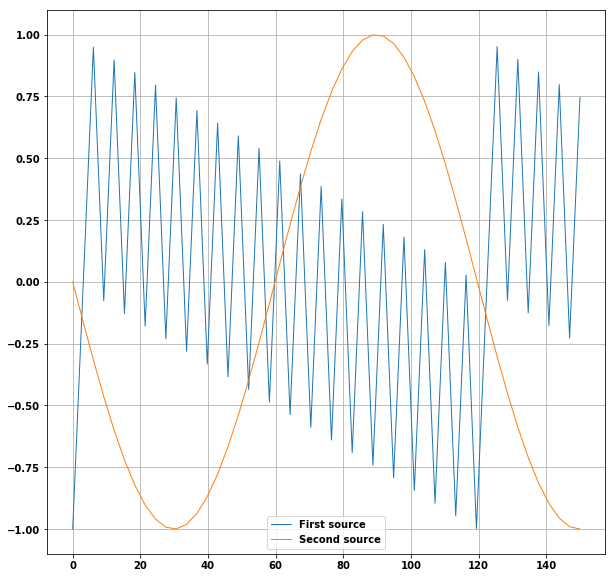

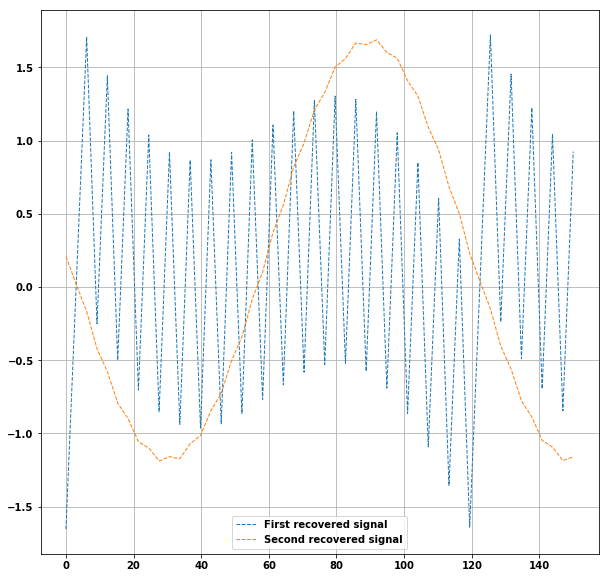

In [9]:
fig = plt.figure(figsize = (10,10))
plt.plot(time_steps, S[:,0], label='First source', lw = 1)
plt.plot(time_steps, S[:,1], label='Second source', lw = 1)
plt.legend()
plt.grid(True)
fig = plt.figure(figsize = (10,10))
plt.plot(time_steps, recoveredX[:,0], '--', label='First recovered signal', lw = 1)
plt.plot(time_steps, recoveredX[:,1], '--', label='Second recovered signal', lw = 1)
plt.legend()
plt.grid(True)